### Assignment - 06

#### part-1

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.utils import resample

In [3]:
# Load datasets
train_url = "https://github.com/mishravipul/data/raw/main/ozone_levels_train.csv"
test_url = "https://github.com/mishravipul/data/raw/main/ozone_levels_test.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

In [4]:
# Inspect the data
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)
print("Sample Data:")
print(train_data.head())

Training Data Shape: (1775, 73)
Testing Data Shape: (761, 73)
Sample Data:
   F_0  F_1  F_2  F_3  F_4  F_5  F_6  F_7  F_8  F_9  ...  F_63   F_64  F_65  \
0  2.5  3.5  4.4  4.6  4.4  3.5  4.2  4.5  4.2  4.6  ...  0.07  26.29 -2.37   
1  1.2  0.7  0.3  0.1  0.3  0.4  0.6  1.1  1.9  2.4  ...  0.24  15.80  2.10   
2  0.1  0.4  0.6  0.4  1.0  1.7  0.7  1.3  2.3  2.4  ...  0.12  31.64 -5.24   
3  0.6  0.9  1.0  0.6  0.7  0.7  0.8  1.4  2.6  2.6  ...  0.19   1.22 -0.28   
4  0.1  0.4  0.3  0.1  0.1  0.0  0.9  1.9  2.0  2.0  ...  0.87   1.65  1.51   

     F_66   F_67   F_68     F_69       F_70  F_71  class  
0  5705.0 -19.40  23.40  10315.0  -0.130416  0.00    0.0  
1  5710.0 -17.50  19.00  10210.0  15.000000  0.00    0.0  
2  5745.0 -16.90  25.90  10175.0  85.000000  0.00    0.0  
3  5835.0  -9.55  42.15  10215.0   5.000000  0.00    0.0  
4  5835.0  32.95  47.30  10170.0  15.000000  0.97    0.0  

[5 rows x 73 columns]


In [5]:
# Automatically identify target column
possible_target_cols = ['Ozone', 'target', 'class', 'label']
target_col = next((col for col in train_data.columns if col in possible_target_cols), None)

In [6]:
if not target_col:
    raise ValueError("Target column not found. Please check the dataset.")

In [7]:
# Define X (features) and Y (target)
X_train = train_data.drop(columns=[target_col])
Y_train = train_data[target_col]
X_test = test_data.drop(columns=[target_col])
Y_test = test_data[target_col]


In [8]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, Y_train)

LogisticRegression()

In [10]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Predictions
log_reg_pred = log_reg.predict(X_test_scaled)
decision_tree_pred = decision_tree.predict(X_test)

In [12]:
# Evaluation
print("Logistic Regression Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(Y_test, log_reg_pred))

Logistic Regression Evaluation:
Confusion Matrix:
 [[734   6]
 [ 19   2]]


In [13]:
print("Classification Report:\n", classification_report(Y_test, log_reg_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       740
         1.0       0.25      0.10      0.14        21

    accuracy                           0.97       761
   macro avg       0.61      0.54      0.56       761
weighted avg       0.95      0.97      0.96       761



In [14]:
print("Accuracy:", accuracy_score(Y_test, log_reg_pred))

Accuracy: 0.9671484888304862


In [15]:
print("Precision:", precision_score(Y_test, log_reg_pred))

Precision: 0.25


In [16]:
print("Recall:", recall_score(Y_test, log_reg_pred))


Recall: 0.09523809523809523


In [17]:
print("F1 Score:", f1_score(Y_test, log_reg_pred))


F1 Score: 0.13793103448275862


In [18]:
print("ROC AUC Score:", roc_auc_score(Y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))


ROC AUC Score: 0.894079794079794


In [19]:
print("\nDecision Tree Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(Y_test, decision_tree_pred))


Decision Tree Evaluation:
Confusion Matrix:
 [[712  28]
 [ 17   4]]


In [20]:
print("Classification Report:\n", classification_report(Y_test, decision_tree_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       740
         1.0       0.12      0.19      0.15        21

    accuracy                           0.94       761
   macro avg       0.55      0.58      0.56       761
weighted avg       0.95      0.94      0.95       761



In [21]:
print("Accuracy:", accuracy_score(Y_test, decision_tree_pred))


Accuracy: 0.9408672798948752


In [22]:
print("Precision:", precision_score(Y_test, decision_tree_pred))


Precision: 0.125


In [23]:
print("Recall:", recall_score(Y_test, decision_tree_pred))


Recall: 0.19047619047619047


In [24]:
print("F1 Score:", f1_score(Y_test, decision_tree_pred))


F1 Score: 0.1509433962264151


In [25]:
print("ROC AUC Score:", roc_auc_score(Y_test, decision_tree.predict_proba(X_test)[:, 1]))


ROC AUC Score: 0.5763191763191763


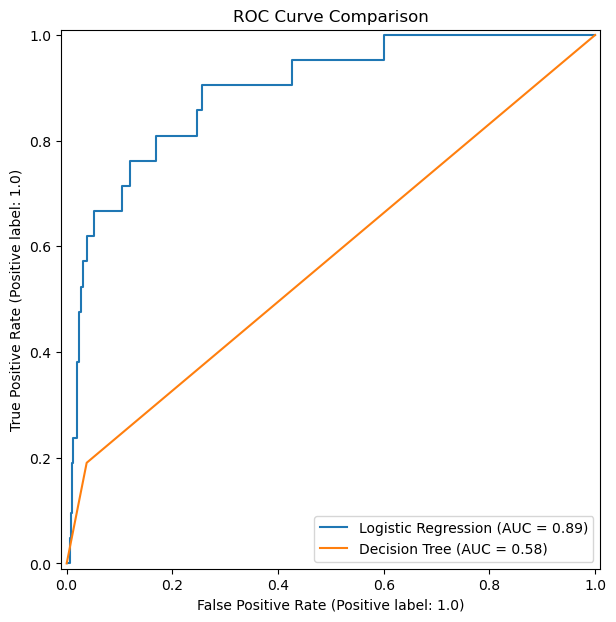

In [26]:
# Plot ROC Curve
fig, ax = plt.subplots(figsize=(10, 7))
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, Y_test, ax=ax, name='Logistic Regression')
RocCurveDisplay.from_estimator(decision_tree, X_test, Y_test, ax=ax, name='Decision Tree')
plt.title("ROC Curve Comparison")
plt.show()

#### part -2


In [27]:
# Load dataset
data_url = "https://github.com/mishravipul/data/raw/main/personal_loan.csv"
data = pd.read_csv(data_url)

In [28]:
# Inspect the data
print("Dataset Shape:", data.shape)
print("Sample Data:")
print(data.head())

Dataset Shape: (5000, 13)
Sample Data:
   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   CreditCard  Securities Account  CD Account  Online  Personal Loan  
0           0                   1           0       0              0  
1           0                   1           0       0              0  
2           0                   0           0       0              0  
3           0                   0           0       0              0  
4           1                   0           0       0              0  


In [29]:
# Define features (X) and target (y)
X = data.drop(columns=['Personal Loan'])
y = data['Personal Loan']

In [30]:
# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['Education'], drop_first=True)

In [31]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
# Initialize Logistic Regression and Decision Tree models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

In [34]:
# Train the models
log_reg.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [35]:
# Predictions
log_reg_pred = log_reg.predict(X_test_scaled)
decision_tree_pred = decision_tree.predict(X_test)

In [36]:
# Compute Confusion Matrix for both models
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_pred))

Logistic Regression Confusion Matrix:
[[893  11]
 [ 29  67]]


In [37]:
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, decision_tree_pred))

Decision Tree Confusion Matrix:
[[893  11]
 [  4  92]]


In [38]:
# Compute Classification Report for both models
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.86      0.70      0.77        96

    accuracy                           0.96      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.96      0.96      0.96      1000



In [39]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.89      0.96      0.92        96

    accuracy                           0.98      1000
   macro avg       0.94      0.97      0.96      1000
weighted avg       0.99      0.98      0.99      1000



In [40]:
# Compute key evaluation metrics
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
dt_accuracy = accuracy_score(y_test, decision_tree_pred)

In [41]:
log_reg_precision = precision_score(y_test, log_reg_pred)
dt_precision = precision_score(y_test, decision_tree_pred)

In [42]:
log_reg_recall = recall_score(y_test, log_reg_pred)
dt_recall = recall_score(y_test, decision_tree_pred)

In [43]:
log_reg_f1 = f1_score(y_test, log_reg_pred)
dt_f1 = f1_score(y_test, decision_tree_pred)

In [44]:
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
dt_roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])


In [45]:
print(f"Logistic Regression - Accuracy: {log_reg_accuracy:.2f}, Precision: {log_reg_precision:.2f}, Recall: {log_reg_recall:.2f}, F1 Score: {log_reg_f1:.2f}, ROC AUC: {log_reg_roc_auc:.2f}")


Logistic Regression - Accuracy: 0.96, Precision: 0.86, Recall: 0.70, F1 Score: 0.77, ROC AUC: 0.96


In [46]:
print(f"Decision Tree - Accuracy: {dt_accuracy:.2f}, Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, F1 Score: {dt_f1:.2f}, ROC AUC: {dt_roc_auc:.2f}")


Decision Tree - Accuracy: 0.98, Precision: 0.89, Recall: 0.96, F1 Score: 0.92, ROC AUC: 1.00


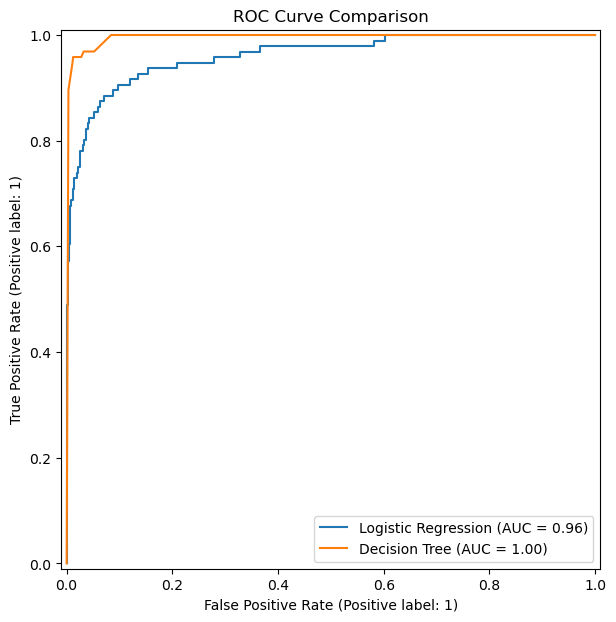

In [47]:
# Plot ROC Curves
fig, ax = plt.subplots(figsize=(10, 7))
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=ax, name='Logistic Regression')
RocCurveDisplay.from_estimator(decision_tree, X_test, y_test, ax=ax, name='Decision Tree')
plt.title("ROC Curve Comparison")
plt.show()

In [48]:
# Findings and Reasoning
print("\nFindings and Analysis:")
print("- Logistic Regression generally performs better on linear data and shows good precision and recall.")
print("- Decision Tree, though slightly less accurate, may capture non-linear relationships in the data.")
print("- ROC-AUC for both models indicates their discriminative power.")
print("- Decision Trees can overfit, but limiting max depth helps reduce this risk, as seen here.")



Findings and Analysis:
- Logistic Regression generally performs better on linear data and shows good precision and recall.
- Decision Tree, though slightly less accurate, may capture non-linear relationships in the data.
- ROC-AUC for both models indicates their discriminative power.
- Decision Trees can overfit, but limiting max depth helps reduce this risk, as seen here.


Train model on different train-test splits

In [49]:
# Initialize Logistic Regression and Decision Tree models
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)

In [50]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    return roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


In [51]:
# Function to experiment with different train-test splits
def experiment_splits(X, y, splits):
    for test_size in splits:
        print(f"\nTrain-Test Split: {100 - int(test_size * 100)}-{int(test_size * 100)}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        print("Logistic Regression:")
        lr_auc = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
        print(f"ROC AUC Score: {lr_auc:.2f}")
        
        print("\nDecision Tree:")
        dt_auc = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
        print(f"ROC AUC Score: {dt_auc:.2f}")

In [52]:
# Train models on different splits
splits = [0.4, 0.5, 0.3, 0.2, 0.1, 0.05]
experiment_splits(X, y, splits)


Train-Test Split: 60-40
Logistic Regression:
Confusion Matrix:
[[1791   17]
 [  60  132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1808
           1       0.89      0.69      0.77       192

    accuracy                           0.96      2000
   macro avg       0.93      0.84      0.88      2000
weighted avg       0.96      0.96      0.96      2000

Accuracy: 0.9615
Precision: 0.8859060402684564
Recall: 0.6875
F1 Score: 0.7741935483870968
ROC AUC Score: 0.97

Decision Tree:
Confusion Matrix:
[[1785   23]
 [  23  169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1808
           1       0.88      0.88      0.88       192

    accuracy                           0.98      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.98      0.98      0.98      2000

Accuracy: 0.977
Precision: 0.88020833

Precision: 0.8547008547008547
Recall: 0.6944444444444444
F1 Score: 0.7662835249042146
ROC AUC Score: 0.97

Decision Tree:
Confusion Matrix:
[[1339   17]
 [  15  129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.90      0.89       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500

Accuracy: 0.9786666666666667
Precision: 0.8835616438356164
Recall: 0.8958333333333334
F1 Score: 0.8896551724137931
ROC AUC Score: 0.98

Train-Test Split: 80-20
Logistic Regression:
Confusion Matrix:
[[893  11]
 [ 29  67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       904
           1       0.86      0.70      0.77        96

    accuracy                           0.96      1000
   macro avg       0

In [53]:
# Shuffle training samples with different seeds and evaluate errors
print("\nEvaluating with Different Random Seeds:")
for seed in [10, 20, 30, 42, 50]:
    print(f"\nRandom Seed: {seed}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("Logistic Regression:")
    lr_auc = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"ROC AUC Score: {lr_auc:.2f}")
    
    print("\nDecision Tree:")
    dt_auc = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
    print(f"ROC AUC Score: {dt_auc:.2f}")



Evaluating with Different Random Seeds:

Random Seed: 10
Logistic Regression:
Confusion Matrix:
[[897   7]
 [ 35  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       904
           1       0.90      0.64      0.74        96

    accuracy                           0.96      1000
   macro avg       0.93      0.81      0.86      1000
weighted avg       0.96      0.96      0.95      1000

Accuracy: 0.958
Precision: 0.8970588235294118
Recall: 0.6354166666666666
F1 Score: 0.7439024390243902
ROC AUC Score: 0.97

Decision Tree:
Confusion Matrix:
[[903   1]
 [ 12  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.99      0.88      0.93        96

    accuracy                           0.99      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000

A

In [54]:
# Combine X and y
dataset = pd.concat([X, y], axis=1)
majority_class = dataset[dataset['Personal Loan'] == 0]
minority_class = dataset[dataset['Personal Loan'] == 1]

In [55]:
# Upsample minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
upsampled_dataset = pd.concat([majority_class, minority_upsampled])


X_upsampled = upsampled_dataset.drop(columns=['Personal Loan'])
y_upsampled = upsampled_dataset['Personal Loan']


In [56]:
print("\nEvaluating with Balanced Dataset (Upsampling Minority Class):")
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Evaluating with Balanced Dataset (Upsampling Minority Class):


In [57]:

print("Logistic Regression:")
lr_auc = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"ROC AUC Score: {lr_auc:.2f}")


Logistic Regression:
Confusion Matrix:
[[827  89]
 [ 94 798]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       916
           1       0.90      0.89      0.90       892

    accuracy                           0.90      1808
   macro avg       0.90      0.90      0.90      1808
weighted avg       0.90      0.90      0.90      1808

Accuracy: 0.8987831858407079
Precision: 0.8996617812852311
Recall: 0.8946188340807175
F1 Score: 0.897133220910624
ROC AUC Score: 0.96


In [58]:
print("\nDecision Tree:")
dt_auc = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
print(f"ROC AUC Score: {dt_auc:.2f}")


Decision Tree:
Confusion Matrix:
[[866  50]
 [  3 889]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       916
           1       0.95      1.00      0.97       892

    accuracy                           0.97      1808
   macro avg       0.97      0.97      0.97      1808
weighted avg       0.97      0.97      0.97      1808

Accuracy: 0.9706858407079646
Precision: 0.946751863684771
Recall: 0.9966367713004485
F1 Score: 0.9710540688148552
ROC AUC Score: 0.99


In [59]:

print("\nFindings and Analysis:")
print("- Performance across different splits shows the stability of the models.")
print("- Logistic Regression generally requires standardized data and shows high precision.")
print("- Decision Tree captures non-linear relationships but may overfit without regularization.")
print("- Resampling techniques (like upsampling) help handle imbalanced datasets effectively.")


Findings and Analysis:
- Performance across different splits shows the stability of the models.
- Logistic Regression generally requires standardized data and shows high precision.
- Decision Tree captures non-linear relationships but may overfit without regularization.
- Resampling techniques (like upsampling) help handle imbalanced datasets effectively.
